<a href="https://colab.research.google.com/github/faiyazabdullah/ML-Research/blob/main/Na%C3%AFveForest_Algorithm_Ling_Spam_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, KFold

# **Data Preprocessing**

In [ ]:
# Load the Ling-Spam dataset (assuming the dataset is loaded into a variable called 'data')
data = pd.read_csv("/content/messages.csv")

# Split the data into features (X) and labels (y)
X = data['message']
y = data['label']

# Perform TF-IDF vectorization on the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Data Presentation**

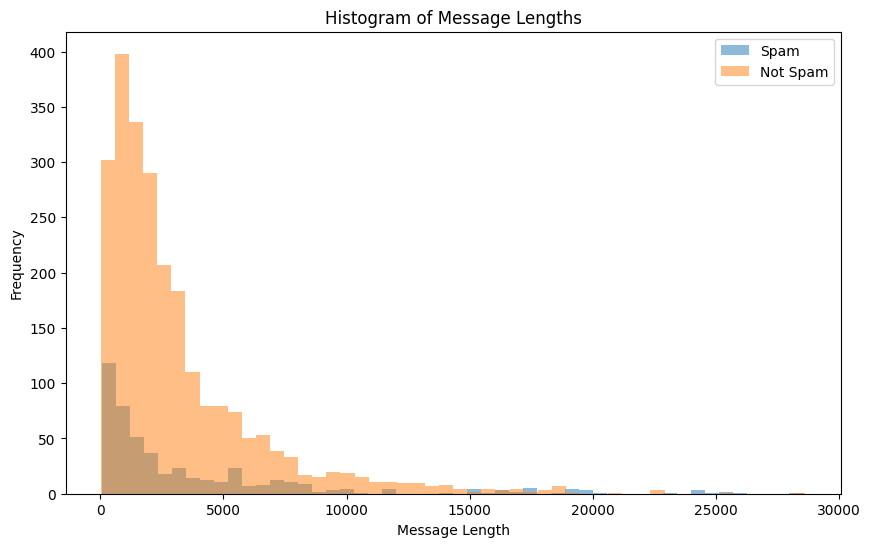

In [ ]:
# Calculate message lengths
data['message_length'] = data['message'].apply(len)

# Plot histogram for message lengths
plt.figure(figsize=(10, 6))
plt.hist(data[data['label'] == 1]['message_length'], bins=50, alpha=0.5, label='Spam')
plt.hist(data[data['label'] == 0]['message_length'], bins=50, alpha=0.5, label='Not Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Message Lengths')
plt.show()

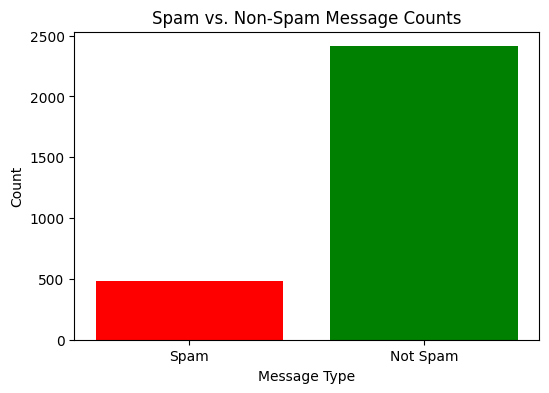

In [ ]:
# Count the number of spam and non-spam messages
spam_count = data[data['label'] == 1]['label'].count()
non_spam_count = data[data['label'] == 0]['label'].count()

# Plot bar plot for spam and non-spam counts
plt.figure(figsize=(6, 4))
plt.bar(['Spam', 'Not Spam'], [spam_count, non_spam_count], color=['red', 'green'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Spam vs. Non-Spam Message Counts')
plt.show()

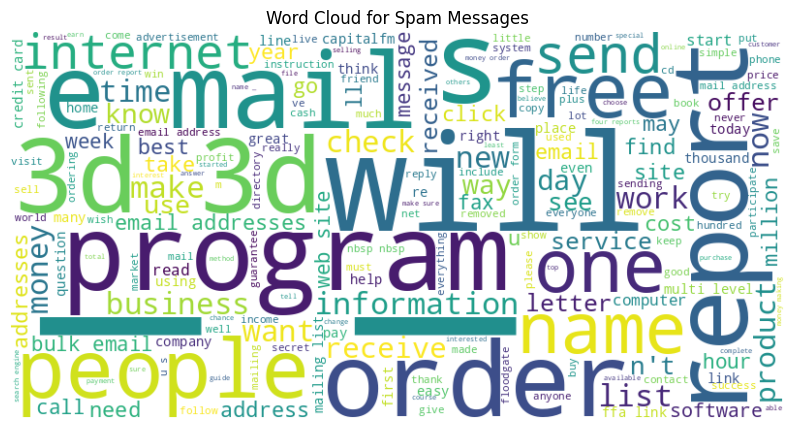

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for spam messages
spam_messages = ' '.join(data[data['label'] == 1]['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Plot the word cloud for spam messages
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# **Train Naive Bayes Classifier for Raw Data**

In [ ]:
# Train Naive Bayes classifier on TF-IDF features
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Test Naive Bayes classifier
naive_bayes_train_predictions = naive_bayes_classifier.predict(X_train)
naive_bayes_test_predictions = naive_bayes_classifier.predict(X_test)

# Calculate accuracy for Naive Bayes
accuracy_nb_train = accuracy_score(y_train, naive_bayes_train_predictions)
accuracy_nb_test = accuracy_score(y_test, naive_bayes_test_predictions)

print("Naive Bayes Training Accuracy:", accuracy_nb_train)
print("Naive Bayes Test Accuracy:", accuracy_nb_test)

Naive Bayes Training Accuracy: 0.8980121002592912
Naive Bayes Test Accuracy: 0.8359240069084629


# **Train Decision Tree Classifier for Raw Data**

In [ ]:
# Train Decision Tree classifier on TF-IDF features
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Test Decision Tree classifier
decision_tree_train_predictions = decision_tree_classifier.predict(X_train)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_decision_tree_train = accuracy_score(y_train, decision_tree_train_predictions)
accuracy_decision_tree_test = accuracy_score(y_test, decision_tree_test_predictions)

print("Decision Tree Training Accuracy:", accuracy_decision_tree_train)
print("Decision Tree Test Accuracy:", accuracy_decision_tree_test)

Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.9499136442141624


# **Train Random Forest Classifier for Raw Data**

In [ ]:
# Train Random Forest classifier on TF-IDF features
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Test Random Forest classifier
random_forest_train_predictions = random_forest_classifier.predict(X_train)
random_forest_test_predictions = random_forest_classifier.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9775474956822107


# **Train Ensemble Classifier for Raw Data**

In [ ]:
# Train Naive Bayes classifier on TF-IDF features
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Train Random Forest classifier on TF-IDF features
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Get probabilities for each class from both classifiers for training data
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train)[:, 1]
random_forest_train_probabilities = random_forest_classifier.predict_proba(X_train)[:, 1]

# Get probabilities for each class from both classifiers for test data
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test)[:, 1]
random_forest_test_probabilities = random_forest_classifier.predict_proba(X_test)[:, 1]

# Define weights for Naive Bayes and Random Forest predictions
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Combine predictions using weighted averaging for training data
ensemble_train_predictions = (weight_naive_bayes * naive_bayes_train_probabilities +
                              weight_random_forest * random_forest_train_probabilities)

# Combine predictions using weighted averaging for test data
ensemble_test_predictions = (weight_naive_bayes * naive_bayes_test_probabilities +
                             weight_random_forest * random_forest_test_probabilities)

# Threshold probabilities to get binary predictions (0 or 1) for training and test data
threshold = 0.5
ensemble_train_predictions_binary = (ensemble_train_predictions > threshold).astype(int)
ensemble_test_predictions_binary = (ensemble_test_predictions > threshold).astype(int)

# Calculate accuracy for the ensemble model for training and test data
accuracy_ensemble_train = accuracy_score(y_train, ensemble_train_predictions_binary)
accuracy_ensemble_test = accuracy_score(y_test, ensemble_test_predictions_binary)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 0.9991356957649092
Ensemble Test Accuracy: 0.9516407599309153


# **Train Naive Bayes Classifier and Extract Naive Bayes Probabilities and Integrate with Features**

In [ ]:
# Train Naive Bayes classifier on the TF-IDF features
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Get Naive Bayes probabilities as features
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train)

# Combine Naive Bayes probabilities with the original features for training data
X_train_enriched = np.hstack((X_train.toarray(), naive_bayes_train_probabilities))

# Transform test data and add Naive Bayes probabilities as features
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test)

# Combine Naive Bayes probabilities with the original features for testing data
X_test_enriched = np.hstack((X_test.toarray(), naive_bayes_test_probabilities))

# **Naive Bayes Classifier on the enriched dataset**

In [ ]:
# Run Naive Bayes Classifier on the enriched dataset
naive_bayes_enriched = MultinomialNB()
naive_bayes_enriched.fit(X_train_enriched, y_train)

# Predict using Naive Bayes for the enriched dataset
naive_bayes_train_predictions_enriched = naive_bayes_enriched.predict(X_train_enriched)
naive_bayes_test_predictions_enriched = naive_bayes_enriched.predict(X_test_enriched)

# Calculate accuracy for Naive Bayes on the enriched dataset
accuracy_nb_train_enriched = accuracy_score(y_train, naive_bayes_train_predictions_enriched)
accuracy_nb_test_enriched = accuracy_score(y_test, naive_bayes_test_predictions_enriched)

print("Naive Bayes Training Accuracy (Enriched Dataset):", accuracy_nb_train_enriched)
print("Naive Bayes Test Accuracy (Enriched Dataset):", accuracy_nb_test_enriched)

Naive Bayes Training Accuracy (Enriched Dataset): 0.9243733794295592
Naive Bayes Test Accuracy (Enriched Dataset): 0.8670120898100173


# **Decision Tree Classifier on the enriched dataset**

In [ ]:
# Run Decision Tree Classifier on the enriched dataset
decision_tree_classifier_enriched = DecisionTreeClassifier(random_state=42)
decision_tree_classifier_enriched.fit(X_train_enriched, y_train)

# Predict using Decision Tree for the enriched dataset
decision_tree_train_predictions_enriched = decision_tree_classifier_enriched.predict(X_train_enriched)
decision_tree_test_predictions_enriched = decision_tree_classifier_enriched.predict(X_test_enriched)

# Calculate accuracy for Decision Tree on the enriched dataset
accuracy_decision_tree_train_enriched = accuracy_score(y_train, decision_tree_train_predictions_enriched)
accuracy_decision_tree_test_enriched = accuracy_score(y_test, decision_tree_test_predictions_enriched)

print("Decision Tree Training Accuracy (Enriched Dataset):", accuracy_decision_tree_train_enriched)
print("Decision Tree Test Accuracy (Enriched Dataset):", accuracy_decision_tree_test_enriched)

Decision Tree Training Accuracy (Enriched Dataset): 1.0
Decision Tree Test Accuracy (Enriched Dataset): 0.9758203799654577


# **Train Random Forest Classifier on Enriched Data**

In [ ]:
# Train Random Forest on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_enriched, y_train)

# Get Random Forest predictions for training and test data
random_forest_train_predictions = random_forest_classifier.predict(X_train_enriched)
random_forest_test_predictions = random_forest_classifier.predict(X_test_enriched)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9844559585492227


# **Ensemble the Models and Make Predictions**

In [ ]:
# Define weights for Naive Bayes and Random Forest predictions
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Combine predictions using weighted averaging
ensemble_train_predictions = (weight_naive_bayes * naive_bayes_train_probabilities[:, 1] +
                              weight_random_forest * random_forest_train_predictions)

ensemble_test_predictions = (weight_naive_bayes * naive_bayes_test_probabilities[:, 1] +
                             weight_random_forest * random_forest_test_predictions)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_train_predictions_binary = (ensemble_train_predictions > threshold).astype(int)
ensemble_test_predictions_binary = (ensemble_test_predictions > threshold).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train, ensemble_train_predictions_binary)
accuracy_ensemble_test = accuracy_score(y_test, ensemble_test_predictions_binary)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 1.0
Ensemble Test Accuracy: 0.9844559585492227


# **Confusion Matrix and Classification Report**
Confusion Matrix summarizes the performance of a machine learning model on a set of test data. And Classification Report summarizes different evaluation metrics like precision, recall, F1-score, and support for each class.

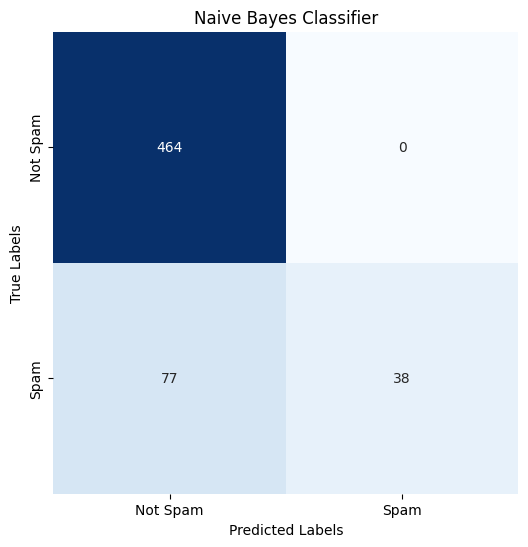

Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       464
           1       1.00      0.33      0.50       115

    accuracy                           0.87       579
   macro avg       0.93      0.67      0.71       579
weighted avg       0.89      0.87      0.84       579



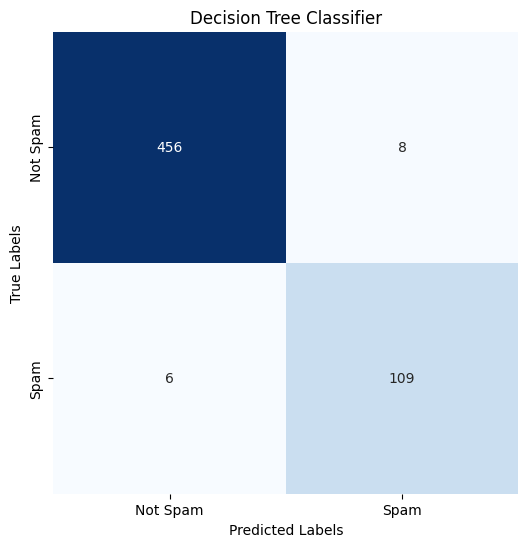

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       464
           1       0.93      0.95      0.94       115

    accuracy                           0.98       579
   macro avg       0.96      0.97      0.96       579
weighted avg       0.98      0.98      0.98       579



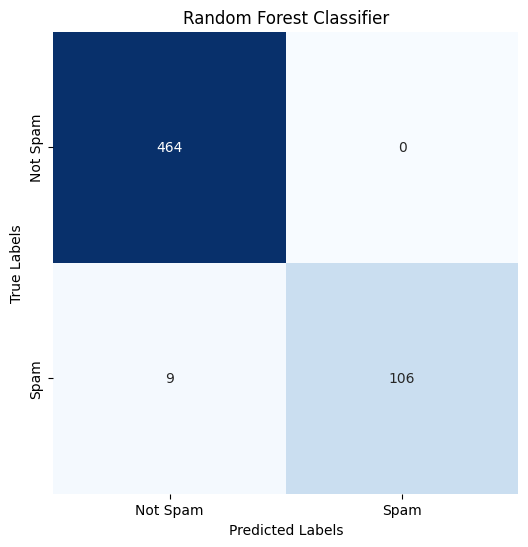

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       464
           1       1.00      0.92      0.96       115

    accuracy                           0.98       579
   macro avg       0.99      0.96      0.97       579
weighted avg       0.98      0.98      0.98       579



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Naive Bayes Classifier Confusion Matrix and Classification Report
plot_confusion_matrix(y_test, naive_bayes_test_predictions_enriched, 'Naive Bayes Classifier')
print("Naive Bayes Classifier Classification Report:")
print(classification_report(y_test, naive_bayes_test_predictions_enriched))

# Decision Tree Classifier Confusion Matrix and Classification Report
plot_confusion_matrix(y_test, decision_tree_test_predictions_enriched, 'Decision Tree Classifier')
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, decision_tree_test_predictions_enriched))

# Random Forest Classifier Confusion Matrix and Classification Report
plot_confusion_matrix(y_test, random_forest_test_predictions, 'Random Forest Classifier')
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, random_forest_test_predictions))

In [ ]:
# Combine predictions using weighted averaging
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Ensemble predictions for test data
ensemble_test_spam_prob = (weight_naive_bayes * naive_bayes_test_probabilities[:, 1] +
                             weight_random_forest * random_forest_test_predictions)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_test_predictions_binary = (ensemble_test_spam_prob > threshold).astype(int)

# Now you can calculate confusion matrix and classification report
cm = confusion_matrix(y_test, ensemble_test_predictions_binary)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, ensemble_test_predictions_binary))

Confusion Matrix:
[[464   0]
 [  9 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       464
           1       1.00      0.92      0.96       115

    accuracy                           0.98       579
   macro avg       0.99      0.96      0.97       579
weighted avg       0.98      0.98      0.98       579



# **10-fold cross validation**

In [ ]:
# Create KFold cross-validation object
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
nb_cv_scores = cross_val_score(naive_bayes_classifier, X_tfidf, y, cv=kf, scoring='accuracy')
print("Naive Bayes Cross-Validation Mean Accuracy:", nb_cv_scores.mean())

# Train Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(decision_tree_classifier, X_tfidf, y, cv=kf, scoring='accuracy')
print("Decision Tree Cross-Validation Mean Accuracy:", dt_cv_scores.mean())

# Train Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(random_forest_classifier, X_tfidf, y, cv=kf, scoring='accuracy')
print("Random Forest Cross-Validation Mean Accuracy:", rf_cv_scores.mean())

# Combine Naive Bayes and Random Forest using Ensemble classifier
weight_naive_bayes = 0.3
weight_random_forest = 0.7
ensemble_classifier = VotingClassifier(estimators=[
    ('naive_bayes', naive_bayes_classifier),
    ('random_forest', random_forest_classifier)],
    voting='soft', weights=[weight_naive_bayes, weight_random_forest])

ensemble_cv_scores = cross_val_score(ensemble_classifier, X_tfidf, y, cv=kf, scoring='accuracy')
print("Ensemble Cross-Validation Mean Accuracy:", ensemble_cv_scores.mean())

Naive Bayes Cross-Validation Mean Accuracy: 0.901156186612576
Decision Tree Cross-Validation Mean Accuracy: 0.9543634411168119
Random Forest Cross-Validation Mean Accuracy: 0.9761520104999404
Ensemble Cross-Validation Mean Accuracy: 0.9616322634530485
